# 🎓 Clasificador de Machine Learning con Matriz de Confusión

## Ejemplo Educativo usando scikit-learn

**Objetivo:** Demostrar el uso de un clasificador clásico (Random Forest) y cómo interpretar los resultados mediante una matriz de confusión.

**Dataset:** Breast Cancer Wisconsin (Cáncer de Mama)
- 569 muestras
- 30 características numéricas
- 2 clases: maligno (0) y benigno (1)

---


## 1. Importación de Librerías


In [39]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

# Semilla para reproducibilidad
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("✅ Librerías importadas correctamente!")


Librerías importadas correctamente!


## 2. Carga y Exploración del Dataset

El dataset de **Breast Cancer Wisconsin** contiene características calculadas a partir de imágenes digitalizadas de aspiraciones con aguja fina (FNA) de masas mamarias. Las características describen propiedades de los núcleos celulares presentes en la imagen.


In [40]:
# Cargar el dataset
datos = load_breast_cancer()

# Extraer características y etiquetas
X = datos.data          # Características (features)
y = datos.target        # Etiquetas (labels)
nombres_clases = datos.target_names
nombres_features = datos.feature_names

# Crear un DataFrame para mejor visualización
df = pd.DataFrame(X, columns=nombres_features)
df['target'] = y
df['diagnostico'] = df['target'].map({0: 'maligno', 1: 'benigno'})

print("📊 INFORMACIÓN DEL DATASET")
print("=" * 50)
print(f"Número de muestras: {X.shape[0]}")
print(f"Número de características: {X.shape[1]}")
print(f"\nClases disponibles: {list(nombres_clases)}")
print(f"\nDistribución de clases:")
print(df['diagnostico'].value_counts())


INFORMACIÓN DEL DATASET
Número de muestras: 569
Número de características: 30

Clases disponibles: [np.str_('malignant'), np.str_('benign')]

Distribución de clases:
diagnostico
benigno    357
maligno    212
Name: count, dtype: int64


In [41]:
# Ver las primeras filas del dataset
print("📋 PRIMERAS 5 MUESTRAS DEL DATASET:")
df.head()


PRIMERAS 5 MUESTRAS DEL DATASET:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,diagnostico
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,maligno
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,maligno
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,maligno
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,maligno
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,maligno


## 3. 🔍 Visualización de Muestras Aleatorias

Vamos a explorar algunas muestras aleatorias del dataset para entender mejor las características y cómo difieren entre casos malignos y benignos.


In [42]:
# Seleccionar muestras aleatorias: una maligna y una benigna
np.random.seed(42)

# Índices de muestras por clase
idx_malignos = np.where(y == 0)[0]
idx_benignos = np.where(y == 1)[0]

# Seleccionar una muestra aleatoria de cada clase
muestra_maligna_idx = np.random.choice(idx_malignos)
muestra_benigna_idx = np.random.choice(idx_benignos)

print("🔬 COMPARACIÓN DE MUESTRAS ALEATORIAS")
print("=" * 60)

print(f"\n📌 MUESTRA MALIGNA (índice {muestra_maligna_idx}):")
print("-" * 40)
muestra_maligna = df.iloc[muestra_maligna_idx]
for i, (feat, val) in enumerate(zip(nombres_features[:10], X[muestra_maligna_idx][:10])):
    print(f"   {feat}: {val:.4f}")
print("   ... (10 de 30 características mostradas)")

print(f"\n📌 MUESTRA BENIGNA (índice {muestra_benigna_idx}):")
print("-" * 40)
muestra_benigna = df.iloc[muestra_benigna_idx]
for i, (feat, val) in enumerate(zip(nombres_features[:10], X[muestra_benigna_idx][:10])):
    print(f"   {feat}: {val:.4f}")
print("   ... (10 de 30 características mostradas)")


COMPARACIÓN DE MUESTRAS ALEATORIAS

MUESTRA MALIGNA (índice 198):
----------------------------------------
   mean radius: 19.1800
   mean texture: 22.4900
   mean perimeter: 127.5000
   mean area: 1148.0000
   mean smoothness: 0.0852
   mean compactness: 0.1428
   mean concavity: 0.1114
   mean concave points: 0.0677
   mean symmetry: 0.1767
   mean fractal dimension: 0.0553
   ... (10 de 30 características mostradas)

MUESTRA BENIGNA (índice 554):
----------------------------------------
   mean radius: 12.8800
   mean texture: 28.9200
   mean perimeter: 82.5000
   mean area: 514.3000
   mean smoothness: 0.0812
   mean compactness: 0.0582
   mean concavity: 0.0619
   mean concave points: 0.0234
   mean symmetry: 0.1566
   mean fractal dimension: 0.0571
   ... (10 de 30 características mostradas)


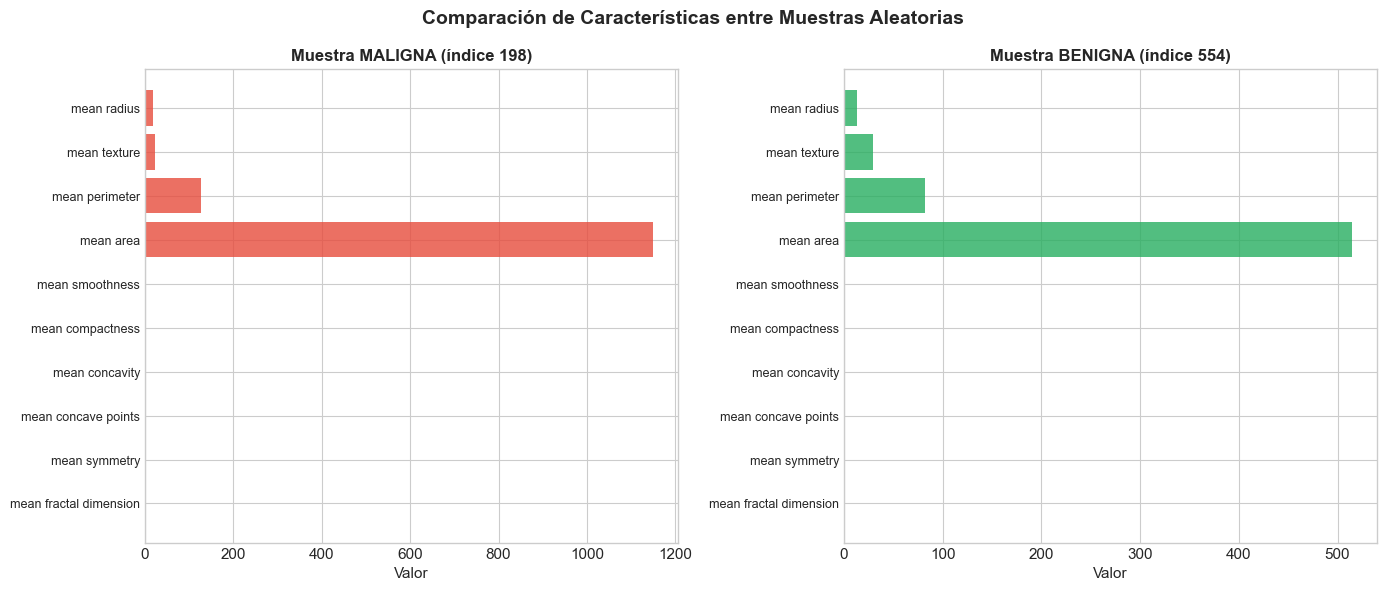

In [43]:
# Visualización gráfica de las muestras aleatorias
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Características a comparar (las primeras 10)
features_to_plot = nombres_features[:10]
x_pos = np.arange(len(features_to_plot))

# Gráfico de la muestra maligna
axes[0].barh(x_pos, X[muestra_maligna_idx][:10], color='#e74c3c', alpha=0.8)
axes[0].set_yticks(x_pos)
axes[0].set_yticklabels(features_to_plot, fontsize=9)
axes[0].set_xlabel('Valor')
axes[0].set_title(f'🔴 Muestra MALIGNA (índice {muestra_maligna_idx})', fontsize=12, fontweight='bold')
axes[0].invert_yaxis()

# Gráfico de la muestra benigna
axes[1].barh(x_pos, X[muestra_benigna_idx][:10], color='#27ae60', alpha=0.8)
axes[1].set_yticks(x_pos)
axes[1].set_yticklabels(features_to_plot, fontsize=9)
axes[1].set_xlabel('Valor')
axes[1].set_title(f'🟢 Muestra BENIGNA (índice {muestra_benigna_idx})', fontsize=12, fontweight='bold')
axes[1].invert_yaxis()

plt.suptitle('Comparación de Características entre Muestras Aleatorias', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


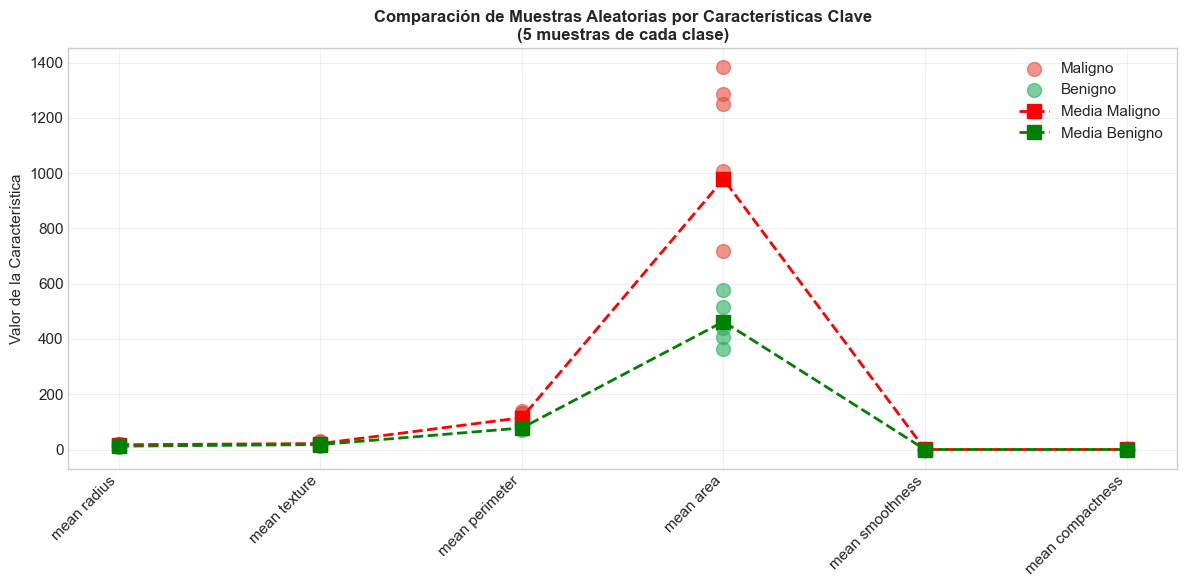


OBSERVACIÓN: Las muestras malignas tienden a tener valores más altos
   en características como 'mean radius', 'mean perimeter' y 'mean area'.


In [44]:
# Visualización de múltiples muestras aleatorias comparando características clave
np.random.seed(123)

# Seleccionar 5 muestras aleatorias de cada clase
n_muestras = 5
muestras_malignas = np.random.choice(idx_malignos, n_muestras, replace=False)
muestras_benignas = np.random.choice(idx_benignos, n_muestras, replace=False)

# Características más relevantes para visualizar
features_clave = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 
                  'mean smoothness', 'mean compactness']
feature_indices = [list(nombres_features).index(f) for f in features_clave]

fig, ax = plt.subplots(figsize=(12, 6))

# Datos para las muestras
for i, idx in enumerate(muestras_malignas):
    valores = X[idx, feature_indices]
    ax.scatter(range(len(features_clave)), valores, color='#e74c3c', alpha=0.6, s=100,
               label='Maligno' if i == 0 else '')
    
for i, idx in enumerate(muestras_benignas):
    valores = X[idx, feature_indices]
    ax.scatter(range(len(features_clave)), valores, color='#27ae60', alpha=0.6, s=100,
               label='Benigno' if i == 0 else '')

# Agregar medias por clase
media_maligno = X[idx_malignos][:, feature_indices].mean(axis=0)
media_benigno = X[idx_benignos][:, feature_indices].mean(axis=0)

ax.plot(range(len(features_clave)), media_maligno, 'r--', linewidth=2, marker='s', 
        markersize=10, label='Media Maligno')
ax.plot(range(len(features_clave)), media_benigno, 'g--', linewidth=2, marker='s', 
        markersize=10, label='Media Benigno')

ax.set_xticks(range(len(features_clave)))
ax.set_xticklabels(features_clave, rotation=45, ha='right')
ax.set_ylabel('Valor de la Característica')
ax.set_title('🔬 Comparación de Muestras Aleatorias por Características Clave\n(5 muestras de cada clase)', 
             fontsize=12, fontweight='bold')
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 OBSERVACIÓN: Las muestras malignas tienden a tener valores más altos")
print("   en características como 'mean radius', 'mean perimeter' y 'mean area'.")


## 4. Preprocesamiento de Datos

El preprocesamiento incluye:
1. **División de datos**: Separar en conjuntos de entrenamiento (80%) y prueba (20%)
2. **Escalado**: Normalizar las características usando `StandardScaler`

### ¿Por qué escalar los datos?
Muchos algoritmos de ML funcionan mejor cuando las características están en la misma escala. `StandardScaler` transforma los datos para que tengan **media 0** y **desviación estándar 1**.


In [45]:
# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,           # 20% para prueba
    random_state=RANDOM_STATE,
    stratify=y                # Mantener proporción de clases
)

print("📌 DIVISIÓN DE DATOS")
print("=" * 50)
print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras ({100*X_train.shape[0]/len(y):.0f}%)")
print(f"Conjunto de prueba: {X_test.shape[0]} muestras ({100*X_test.shape[0]/len(y):.0f}%)")

print(f"\nDistribución de clases en entrenamiento:")
unique, counts = np.unique(y_train, return_counts=True)
for clase, conteo in zip(unique, counts):
    print(f"   Clase {clase} ({nombres_clases[clase]}): {conteo} muestras")


DIVISIÓN DE DATOS
Conjunto de entrenamiento: 455 muestras (80%)
Conjunto de prueba: 114 muestras (20%)

Distribución de clases en entrenamiento:
   Clase 0 (malignant): 170 muestras
   Clase 1 (benign): 285 muestras


In [24]:
# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Ajustar y transformar (solo en entrenamiento)
X_test_scaled = scaler.transform(X_test)        # Solo transformar (usar parámetros de entrenamiento)

print("📌 ESCALADO DE CARACTERÍSTICAS")
print("=" * 50)
print("\nAntes del escalado (primera característica):")
print(f"   Media: {X_train[:, 0].mean():.4f}")
print(f"   Desviación estándar: {X_train[:, 0].std():.4f}")

print("\nDespués del escalado (primera característica):")
print(f"   Media: {X_train_scaled[:, 0].mean():.4f}")
print(f"   Desviación estándar: {X_train_scaled[:, 0].std():.4f}")

print("\n✅ Datos escalados correctamente!")


ESCALADO DE CARACTERÍSTICAS

Antes del escalado (primera característica):
   Media: 14.0672
   Desviación estándar: 3.4955

Después del escalado (primera característica):
   Media: -0.0000
   Desviación estándar: 1.0000


## 5. Entrenamiento del Modelo

Utilizaremos **Random Forest Classifier**, un algoritmo de ensemble que:
- Combina múltiples árboles de decisión
- Es robusto ante el overfitting
- No requiere mucho ajuste de hiperparámetros
- Funciona bien con datos de alta dimensionalidad


In [ ]:
# Crear y entrenar el modelo Random Forest
modelo = RandomForestClassifier(
    n_estimators=100,           # Número de árboles en el bosque
    max_depth=10,               # Profundidad máxima de cada árbol
    min_samples_split=5,        # Mínimo de muestras para dividir un nodo
    random_state=RANDOM_STATE
)

print("🌲 ENTRENAMIENTO DEL MODELO RANDOM FOREST")
print("=" * 50)
print("\nHiperparámetros configurados:")
print(f"   • n_estimators: 100 (número de árboles)")
print(f"   • max_depth: 10 (profundidad máxima)")
print(f"   • min_samples_split: 5")
print(f"   • random_state: {RANDOM_STATE}")

print("\n🔄 Entrenando modelo...")
modelo.fit(X_train_scaled, y_train)
print("✅ ¡Modelo entrenado exitosamente!")


ENTRENAMIENTO DEL MODELO RANDOM FOREST

Hiperparámetros configurados:
   • n_estimators: 100 (número de árboles)
   • max_depth: 10 (profundidad máxima)
   • min_samples_split: 5
   • random_state: 42

Entrenando modelo...
Modelo entrenado exitosamente!


## 6. Evaluación del Modelo

### Métricas de Clasificación

| Métrica | Descripción |
|---------|-------------|
| **Accuracy** | Proporción de predicciones correctas sobre el total |
| **Precision** | De los predichos positivos, ¿cuántos son realmente positivos? |
| **Recall** | De los positivos reales, ¿cuántos detectamos? |
| **F1-Score** | Media armónica entre Precision y Recall |


In [50]:
# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test_scaled)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("📊 MÉTRICAS DE EVALUACIÓN")
print("=" * 50)
print(f"\n   Accuracy:  {accuracy:.4f}  ({accuracy*100:.2f}%)")
print(f"   Precision: {precision:.4f}  ({precision*100:.2f}%)")
print(f"   Recall:    {recall:.4f}  ({recall*100:.2f}%)")
print(f"   F1-Score:  {f1:.4f}  ({f1*100:.2f}%)")


Metricas de Evaluacion

   Accuracy:  0.9474  (94.74%)
   Precision: 0.9474  (94.74%)
   Recall:    0.9474  (94.74%)
   F1-Score:  0.9474  (94.74%)


In [51]:
# Reporte de clasificación detallado
print("📋 REPORTE DE CLASIFICACIÓN DETALLADO")
print("=" * 50)
print(classification_report(y_test, y_pred, target_names=nombres_clases))


Reporte de clasificacion
              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        42
      benign       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



## 7. 📊 Matriz de Confusión

La matriz de confusión es una herramienta fundamental para evaluar el rendimiento de un clasificador. Muestra la relación entre las predicciones del modelo y los valores reales.

```
                    PREDICCIÓN
                 Negativo   Positivo
              ┌───────────┬───────────┐
    REAL      │           │           │
  Negativo    │    VN     │    FP     │
              ├───────────┼───────────┤
  Positivo    │    FN     │    VP     │
              └───────────┴───────────┘
```

- **VN (Verdaderos Negativos)**: Correctamente clasificados como negativos
- **VP (Verdaderos Positivos)**: Correctamente clasificados como positivos  
- **FP (Falsos Positivos)**: Error Tipo I - Negativos predichos como positivos
- **FN (Falsos Negativos)**: Error Tipo II - Positivos predichos como negativos


In [53]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

print("📊 MATRIZ DE CONFUSIÓN (valores numéricos)")
print("=" * 50)
print(f"\n                    PREDICCIÓN")
print(f"                 {nombres_clases[0]:^10} {nombres_clases[1]:^10}")
print(f"              ┌───────────┬───────────┐")
print(f"    REAL      │           │           │")
print(f"  {nombres_clases[0]:^10} │  {cm[0,0]:^7}  │  {cm[0,1]:^7}  │")
print(f"              ├───────────┼───────────┤")
print(f"  {nombres_clases[1]:^10} │  {cm[1,0]:^7}  │  {cm[1,1]:^7}  │")
print(f"              └───────────┴───────────┘")


MATRIZ DE CONFUSIÓN (valores numéricos)

                    PREDICCIÓN
                 malignant    benign  
              ┌───────────┬───────────┐
    REAL      │           │           │
  malignant  │    39     │     3     │
              ├───────────┼───────────┤
    benign   │     3     │    69     │
              └───────────┴───────────┘


In [54]:
# Interpretación de la matriz de confusión
print("📖 INTERPRETACIÓN DE LA MATRIZ DE CONFUSIÓN")
print("=" * 50)

# Extraer valores
vn = cm[0, 0]  # Verdaderos Negativos
fp = cm[0, 1]  # Falsos Positivos
fn = cm[1, 0]  # Falsos Negativos
vp = cm[1, 1]  # Verdaderos Positivos

print(f"""
✅ Verdaderos Negativos (VN): {vn}
   → Casos malignos correctamente identificados como malignos

✅ Verdaderos Positivos (VP): {vp}
   → Casos benignos correctamente identificados como benignos

❌ Falsos Positivos (FP): {fp}
   → Casos malignos clasificados erróneamente como benignos
   → ⚠️ ¡Error crítico en diagnóstico médico! (paciente con cáncer no detectado)

❌ Falsos Negativos (FN): {fn}
   → Casos benignos clasificados erróneamente como malignos
   → Genera ansiedad innecesaria al paciente

📌 En medicina, minimizar los Falsos Positivos (FP) es crucial,
   ya que significa no detectar un cáncer existente.
""")


INTERPRETACIÓN DE LA MATRIZ DE CONFUSIÓN

Verdaderos Negativos (VN): 39
   → Casos malignos correctamente identificados como malignos

Verdaderos Positivos (VP): 69
   → Casos benignos correctamente identificados como benignos

Falsos Positivos (FP): 3
   → Casos malignos clasificados erróneamente como benignos
   → ¡Error crítico en diagnóstico médico! (paciente con cáncer no detectado)

Falsos Negativos (FN): 3
   → Casos benignos clasificados erróneamente como malignos
   → Genera ansiedad innecesaria al paciente

En medicina, minimizar los Falsos Positivos (FP) es crucial,
   ya que significa no detectar un cáncer existente.



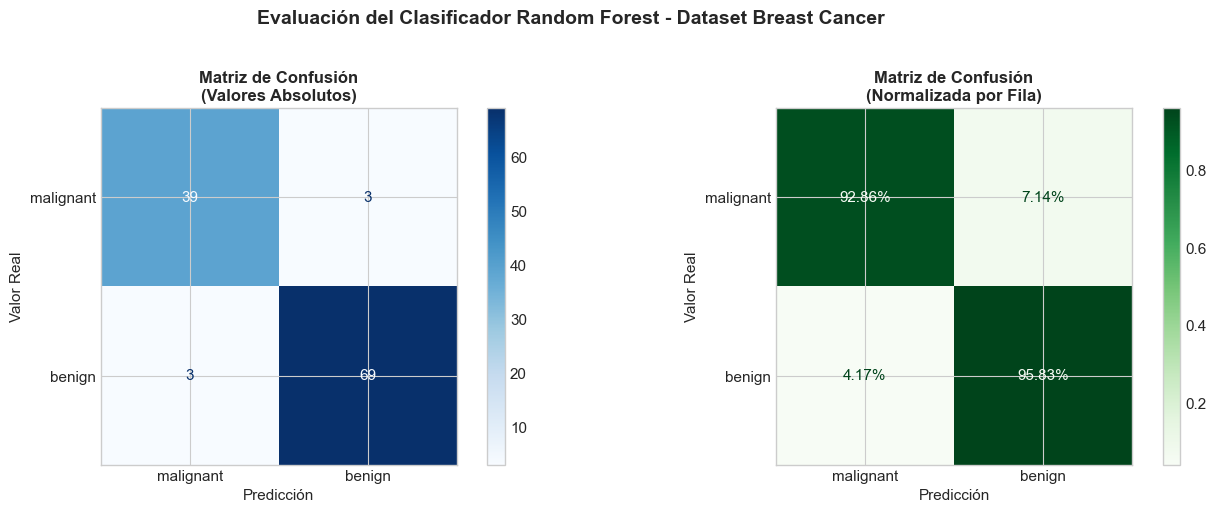

In [55]:
# Visualización gráfica de la matriz de confusión
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Matriz de confusión con valores absolutos
disp1 = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=nombres_clases
)
disp1.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title('Matriz de Confusión\n(Valores Absolutos)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Predicción', fontsize=11)
axes[0].set_ylabel('Valor Real', fontsize=11)

# Matriz de confusión normalizada (porcentajes)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp2 = ConfusionMatrixDisplay(
    confusion_matrix=cm_normalized,
    display_labels=nombres_clases
)
disp2.plot(ax=axes[1], cmap='Greens', values_format='.2%')
axes[1].set_title('Matriz de Confusión\n(Normalizada por Fila)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Predicción', fontsize=11)
axes[1].set_ylabel('Valor Real', fontsize=11)

plt.suptitle('Evaluación del Clasificador Random Forest - Dataset Breast Cancer', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


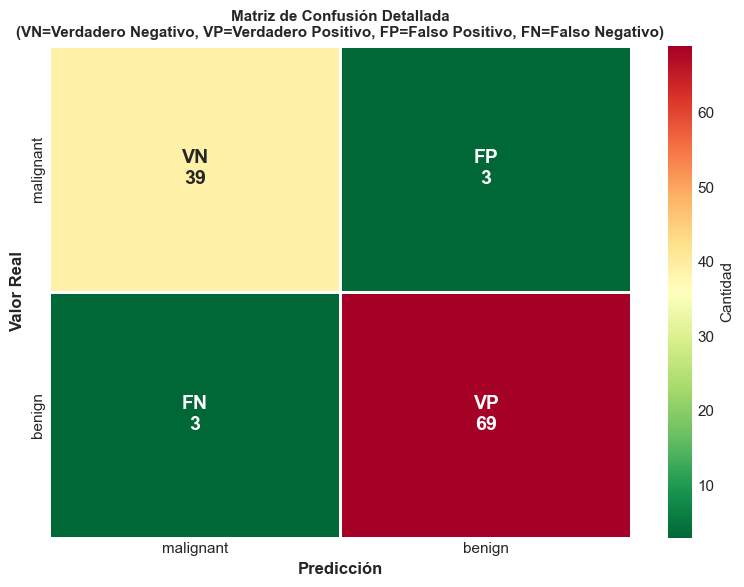

In [56]:
# Visualización alternativa con Seaborn (más estilizada)
fig, ax = plt.subplots(figsize=(8, 6))

# Crear anotaciones personalizadas
annotations = np.array([
    [f'VN\n{cm[0,0]}', f'FP\n{cm[0,1]}'],
    [f'FN\n{cm[1,0]}', f'VP\n{cm[1,1]}']
])

sns.heatmap(cm, annot=annotations, fmt='', cmap='RdYlGn_r', 
            xticklabels=nombres_clases, yticklabels=nombres_clases,
            linewidths=2, linecolor='white', cbar_kws={'label': 'Cantidad'},
            ax=ax, annot_kws={'size': 14, 'weight': 'bold'})

ax.set_xlabel('Predicción', fontsize=12, fontweight='bold')
ax.set_ylabel('Valor Real', fontsize=12, fontweight='bold')
ax.set_title('🎯 Matriz de Confusión Detallada\n(VN=Verdadero Negativo, VP=Verdadero Positivo, FP=Falso Positivo, FN=Falso Negativo)', 
             fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


## 8. Conclusiones y Puntos Clave

La matriz de confusion es fundamental para entender el comportamiento de un clasificador mas alla de la simple accuracy.

En problemas medicos, los Falsos Negativos (FN) o Falsos Positivos (FP) pueden ser mas criticos dependiendo del contexto.

Random Forest es un excelente punto de partida por su robustez y facilidad de uso.

Siempre dividir los datos en entrenamiento y prueba para evaluar la capacidad de generalizacion del modelo.


In [ ]:
# Resumen final
print("=" * 60)
print("🎓 RESUMEN FINAL DEL CLASIFICADOR")
print("=" * 60)
print(f"""
Dataset:        Breast Cancer Wisconsin
Algoritmo:      Random Forest (100 arboles)
Muestras:       {len(y)} total ({X_train.shape[0]} train / {X_test.shape[0]} test)

METRICAS FINALES:
   Accuracy:    {accuracy*100:.2f}%
   Precision:   {precision*100:.2f}%
   Recall:      {recall*100:.2f}%
   F1-Score:    {f1*100:.2f}%

MATRIZ DE CONFUSION:
   Verdaderos Negativos (VN): {vn}
   Verdaderos Positivos (VP): {vp}
   Falsos Positivos (FP):     {fp}
   Falsos Negativos (FN):     {fn}
""")
print("=" * 60)
print("FIN DEL EJEMPLO")
print("=" * 60)


RESUMEN FINAL DEL CLASIFICADOR

Dataset:        Breast Cancer Wisconsin
Algoritmo:      Random Forest (100 arboles)
Muestras:       569 total (455 train / 114 test)

METRICAS FINALES:
   Accuracy:    94.74%
   Precision:   94.74%
   Recall:      94.74%
   F1-Score:    94.74%

MATRIZ DE CONFUSION:
   Verdaderos Negativos (VN): 39
   Verdaderos Positivos (VP): 69
   Falsos Positivos (FP):     3
   Falsos Negativos (FN):     3

FIN DEL EJEMPLO
